In [ ]:
from AlgorithmImports import *

class DualRelativeStrengthStrategy(QCAlgorithm):
    def Initialize(self):
        self.SetStartDate(2020, 1, 1)
        self.SetEndDate(2023, 1, 1)
        self.SetCash(100000)
        
        self.asset1 = self.AddEquity("MSFT", Resolution.Daily).Symbol  
        self.asset2 = self.AddEquity("TSLA", Resolution.Daily).Symbol  
        
        self.momentum1 = self.MOMP(self.asset1, 30, Resolution.Daily)
        self.momentum2 = self.MOMP(self.asset2, 30, Resolution.Daily)
        
        self.current_invested = None

    def OnData(self, data):
        if not self.momentum1.IsReady or not self.momentum2.IsReady:
            return
        
        momentum1_value = self.momentum1.Current.Value
        momentum2_value = self.momentum2.Current.Value
        
        if momentum1_value > momentum2_value and self.current_invested != self.asset1:
            self.SetHoldings(self.asset1, 1)
            self.SetHoldings(self.asset2, 0)  
            self.current_invested = self.asset1
            self.Debug(f"Switching to {self.asset1}, Momentum: {momentum1_value}")
        
        elif momentum2_value > momentum1_value and self.current_invested != self.asset2:
            self.SetHoldings(self.asset2, 1)
            self.SetHoldings(self.asset1, 0)  
            self.current_invested = self.asset2
            self.Debug(f"Switching to {self.asset2}, Momentum: {momentum2_value}")

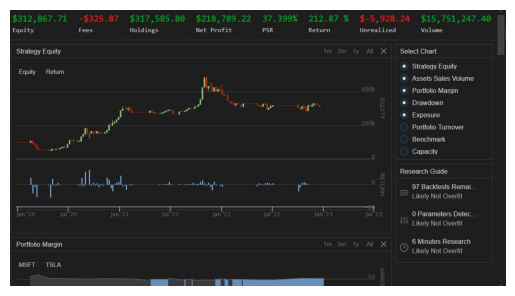

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "C:/Users/meets/QUANT/CODE/QUANTCONNECT/MOMENTUMPERCENT_30.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()